# Test Ground Truth

In [1]:
%%capture
!pip install datasets
!pip install transformers

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import qa_experimenters
import models
from interpreters import baseline_interpreter

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [5]:
# disable info logging for datasets
qa_experimenters.datasets.logging.set_verbosity_error()

In [6]:
def plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt):
    # take the best delta as the true one, since we also use the "best segment" as ground truth
    # check the variances of the deltas to get a sense of how the different GTs have an effect
    fig = plt.figure(figsize=(14, 10))
    plt.suptitle('Variance of Results', fontsize=20)

    plt.subplot(2, 2, 1)
    plt.hist([np.std(d) for d in delta_pred])
    plt.title('Delta Prediction, remove GT, max {}'.format(max([np.std(d) for d in delta_pred])))

    plt.subplot(2, 2, 2)
    plt.hist([np.std(d) for d in delta_prob])
    plt.title('Delta Probability, remove GT, max {}'.format(max([np.std(d) for d in delta_prob])))

    plt.subplot(2, 2, 3)
    plt.hist([np.std(d) for d in delta_pred_gt])
    plt.title('Delta Prediction, only keep GT, max {}'.format(max([np.std(d) for d in delta_pred_gt])))

    plt.subplot(2, 2, 4)
    plt.hist([np.std(d) for d in delta_prob_gt])
    plt.title('Delta Probability, only keep GT, max {}'.format(max([np.std(d) for d in delta_prob_gt])))
    plt.show()
    
    # take the best delta as the true one, since we also use the "best segment" as ground truth
    fig = plt.figure(figsize=(14, 10))
    plt.suptitle('Results', fontsize=20)

    plt.subplot(2, 2, 1)
    plt.hist([np.min(d) for d in delta_pred])
    plt.title('Delta Prediction, remove GT, mean {}'.format(np.mean([np.min(d) for d in delta_pred])))

    plt.subplot(2, 2, 2)
    plt.hist([np.min(d) for d in delta_prob])
    plt.title('Delta Probability, remove GT, mean {}'.format(np.mean([np.min(d) for d in delta_prob])))

    plt.subplot(2, 2, 3)
    plt.hist([np.max(d) for d in delta_pred_gt])
    plt.title('Delta Prediction, only keep GT, mean {}'.format(np.mean([np.max(d) for d in delta_pred_gt])))

    plt.subplot(2, 2, 4)
    plt.hist([np.max(d) for d in delta_prob_gt])
    plt.title('Delta Probability, only keep GT, mean {}'.format(np.mean([np.max(d) for d in delta_prob_gt])))
    plt.show()

Some weights of the model checkpoint at a-ware/roberta-large-squad-classification were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 11873/11873 [1:41:59<00:00,  1.94it/s] 


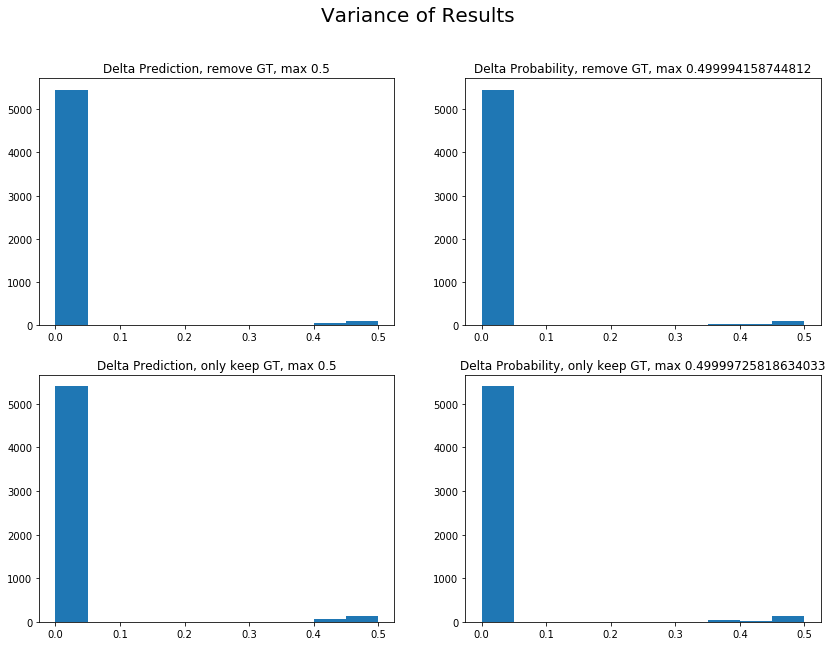

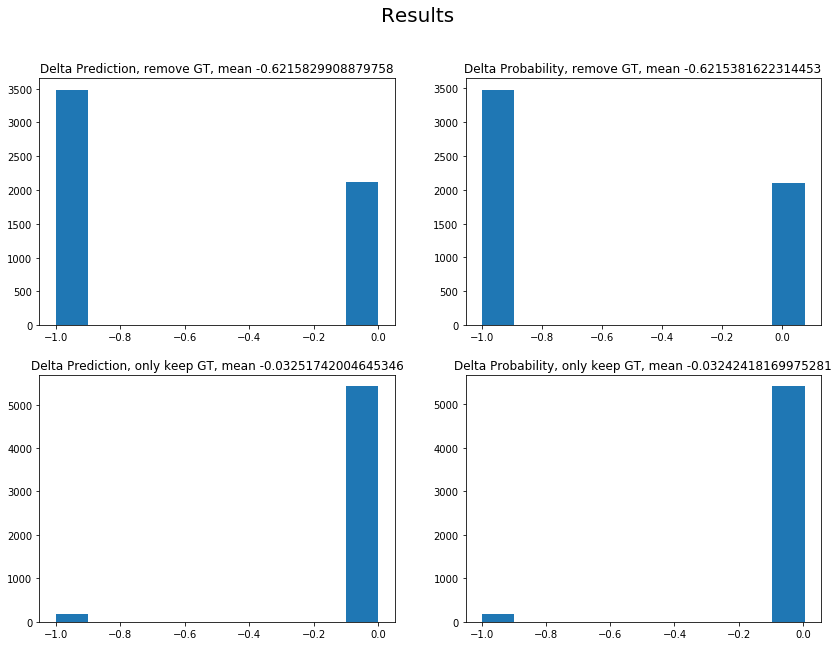

In [10]:
experimenter = qa_experimenters.SQuADExperimenter(models.Model_Classification(device=device), baseline_interpreter.random_interpreter)
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

100%|██████████| 11873/11873 [35:41<00:00,  5.54it/s] 


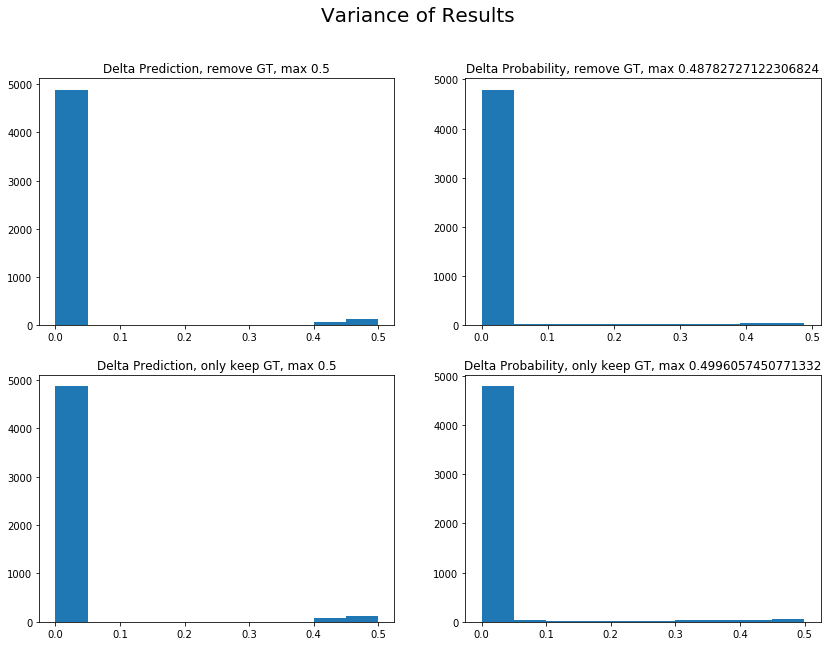

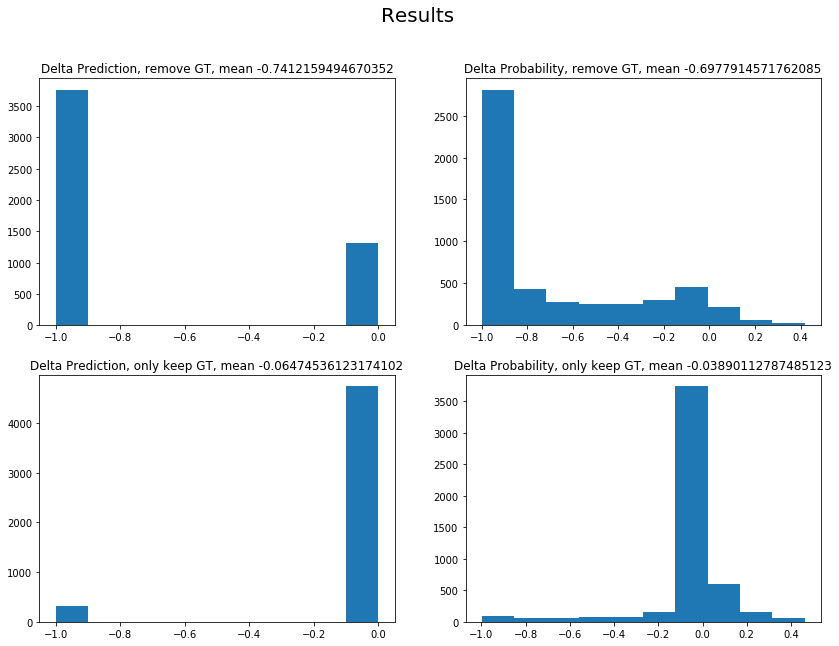

In [11]:
experimenter = qa_experimenters.SQuADExperimenter(models.Model_QA(device=device), baseline_interpreter.random_interpreter)
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

Some weights of the model checkpoint at a-ware/roberta-large-squad-classification were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 7938/7938 [2:02:40<00:00,  1.08it/s]  


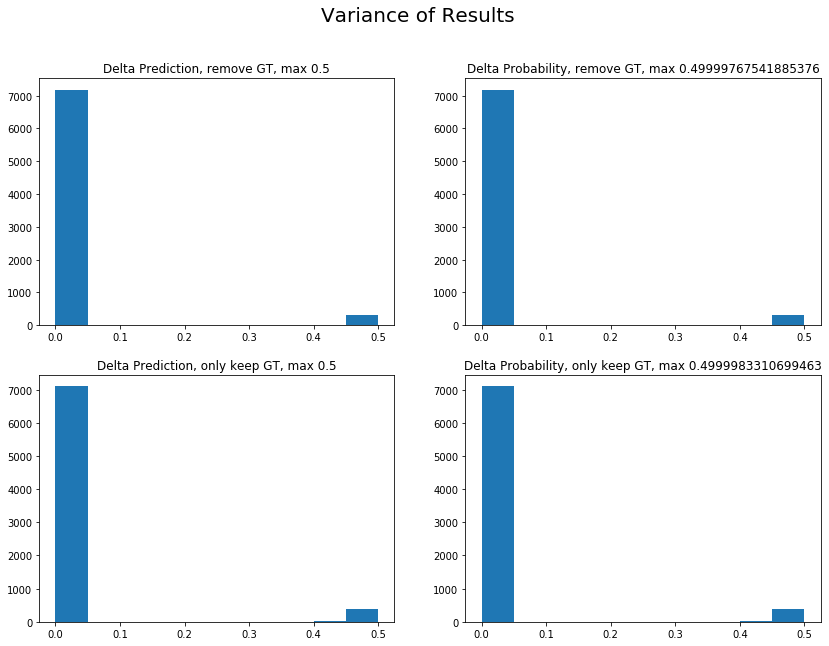

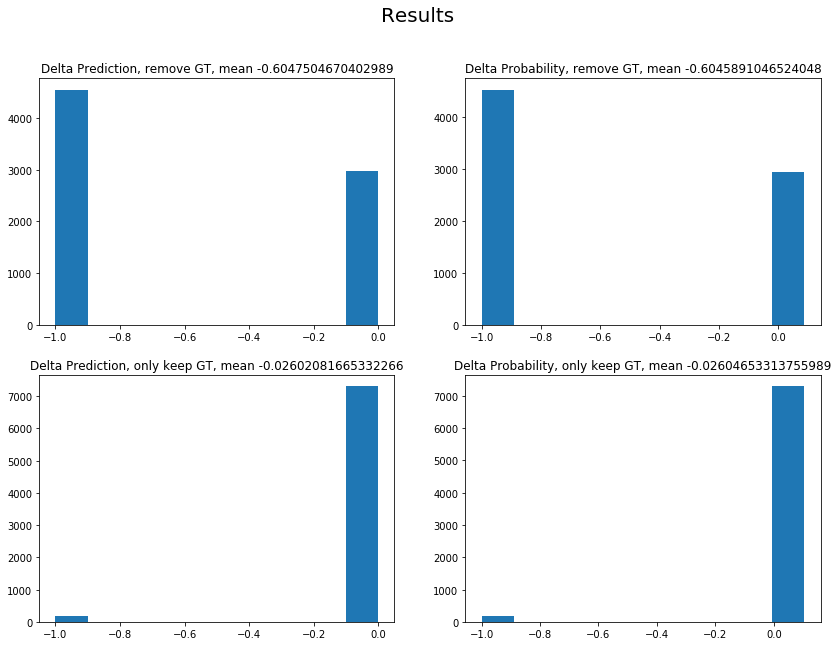

In [7]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_Classification(device=device), baseline_interpreter.random_interpreter, 'new_wiki')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

100%|██████████| 7938/7938 [43:24<00:00,  3.05it/s]  


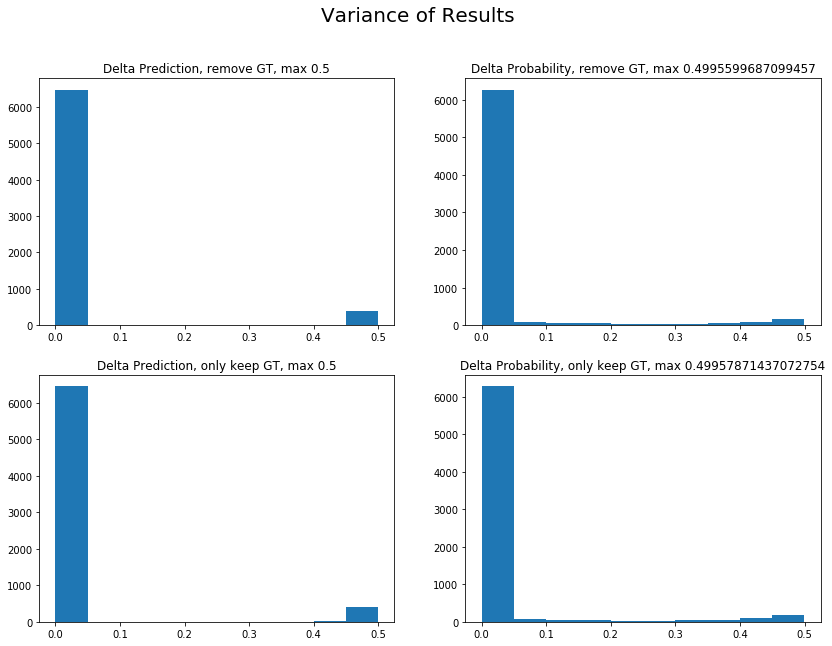

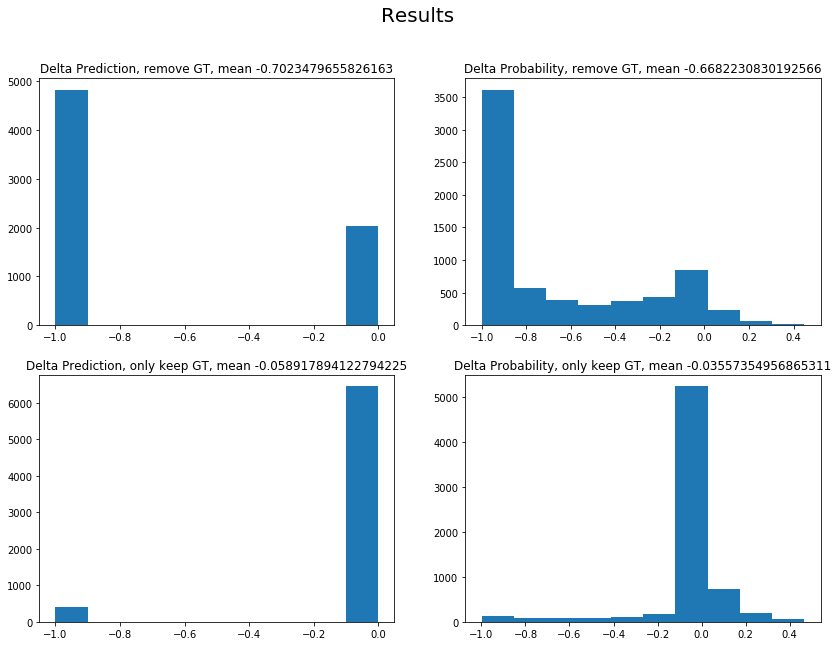

In [8]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_QA(device=device), baseline_interpreter.random_interpreter, 'new_wiki')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

Some weights of the model checkpoint at a-ware/roberta-large-squad-classification were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 10065/10065 [2:46:14<00:00,  1.01it/s] 


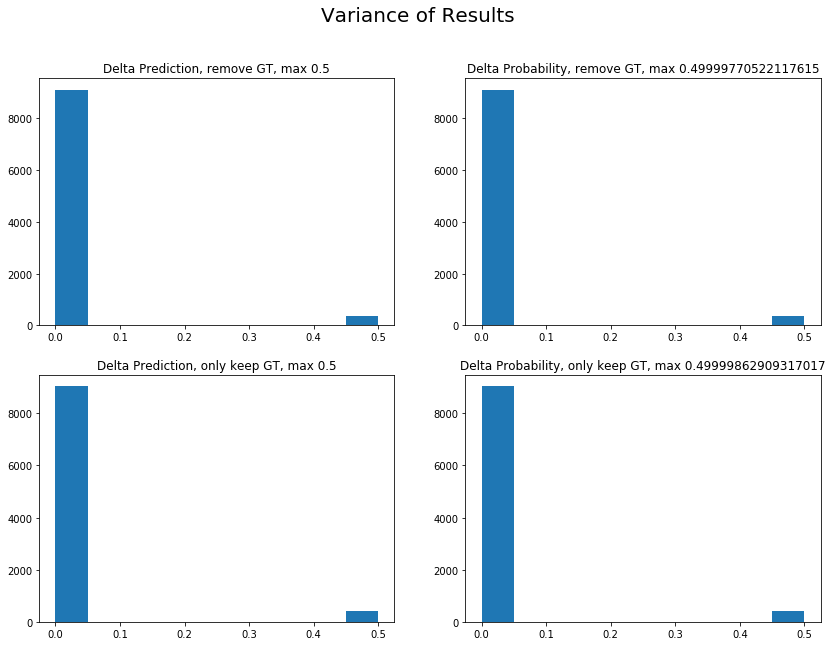

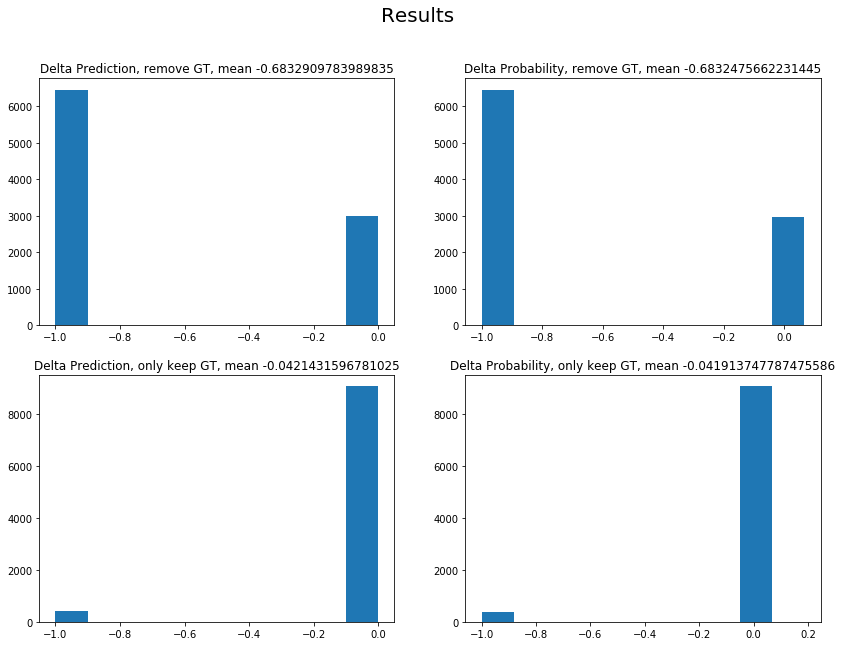

In [9]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_Classification(device=device), baseline_interpreter.random_interpreter, 'nyt')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

100%|██████████| 10065/10065 [54:34<00:00,  3.07it/s] 


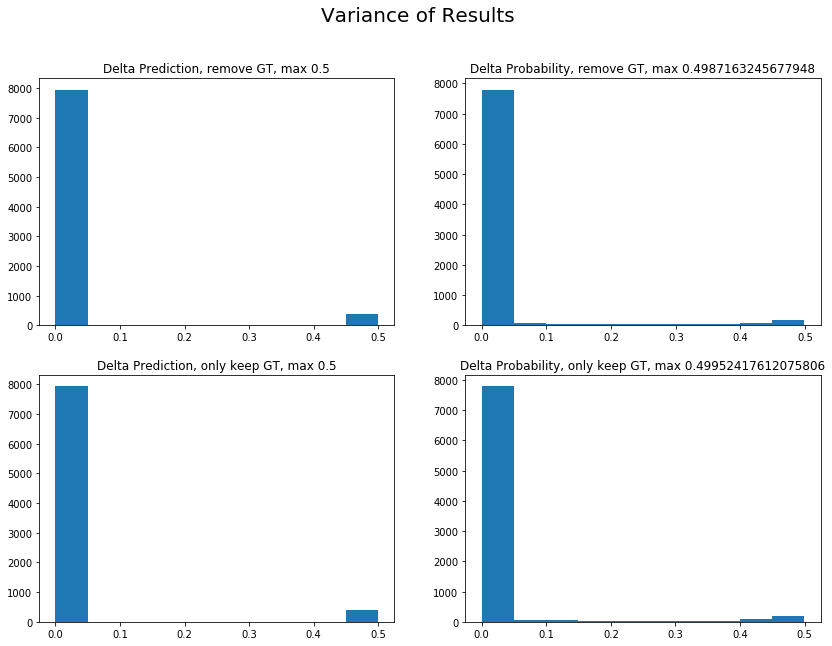

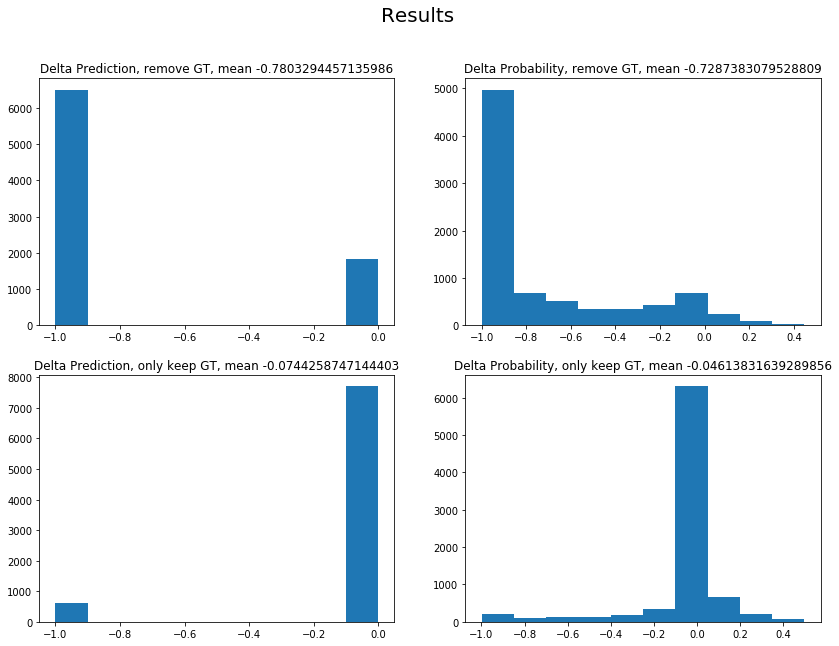

In [10]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_QA(device=device), baseline_interpreter.random_interpreter, 'nyt')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

Some weights of the model checkpoint at a-ware/roberta-large-squad-classification were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 9803/9803 [2:17:58<00:00,  1.18it/s]  


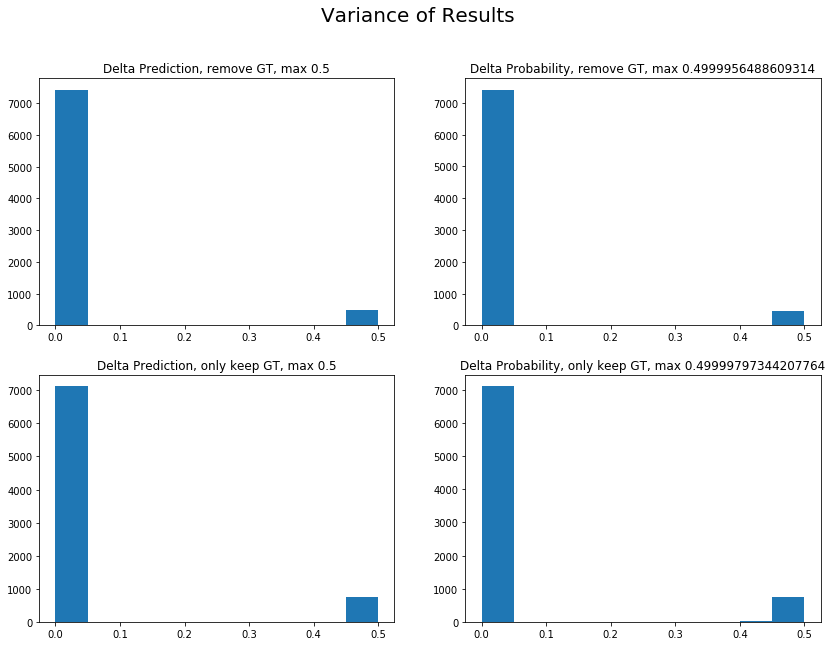

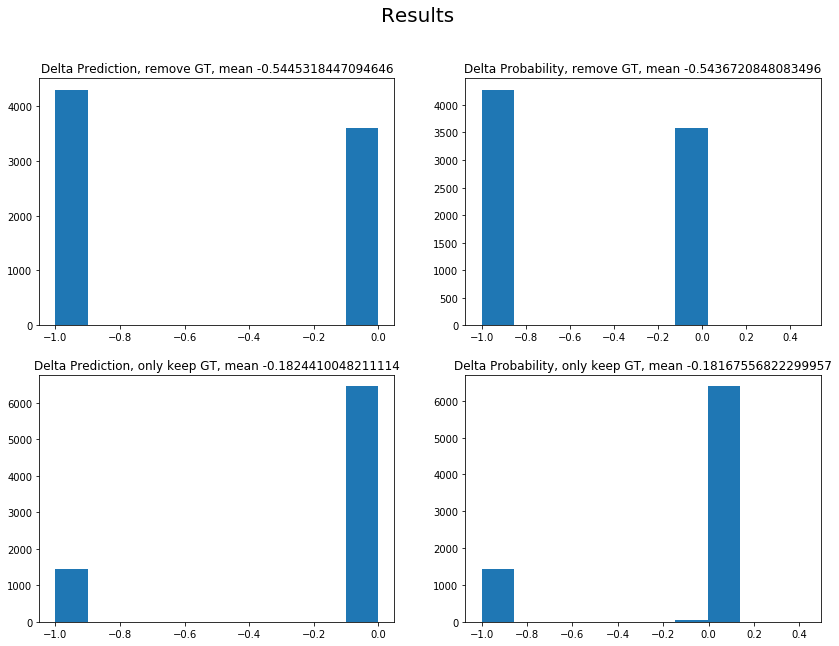

In [7]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_Classification(device=device), baseline_interpreter.random_interpreter, 'reddit')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

100%|██████████| 9803/9803 [38:04<00:00,  4.29it/s]  


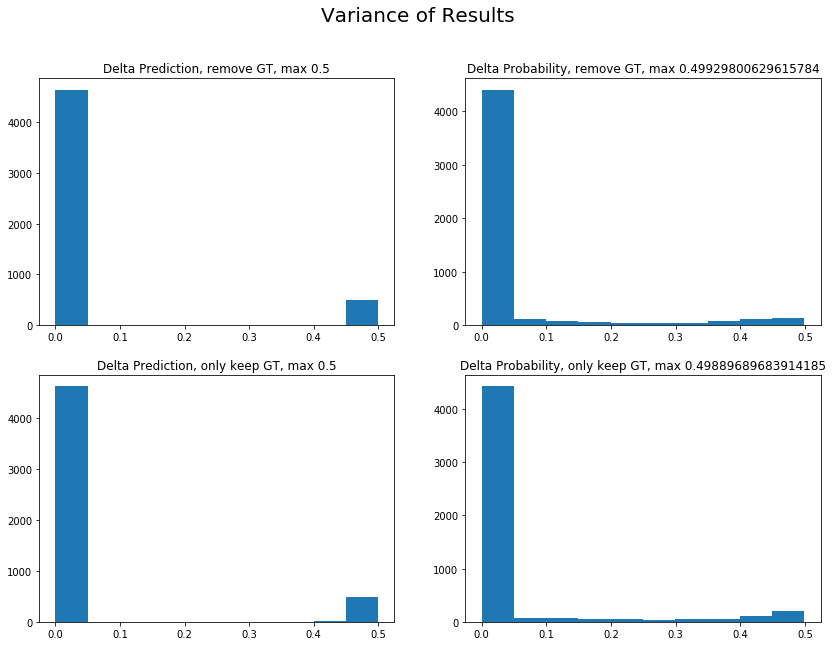

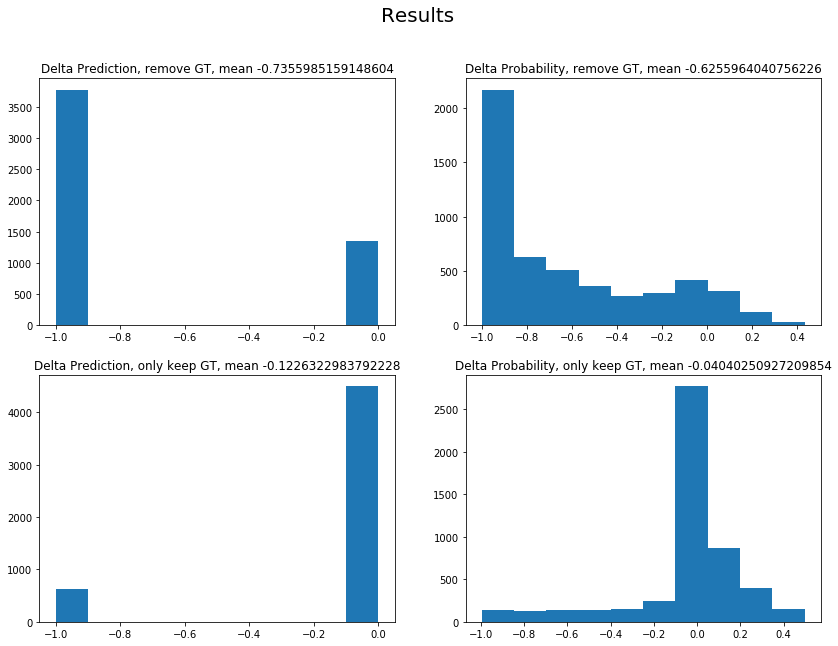

In [8]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_QA(device=device), baseline_interpreter.random_interpreter, 'reddit')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

Some weights of the model checkpoint at a-ware/roberta-large-squad-classification were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 9885/9885 [2:23:35<00:00,  1.15it/s]  


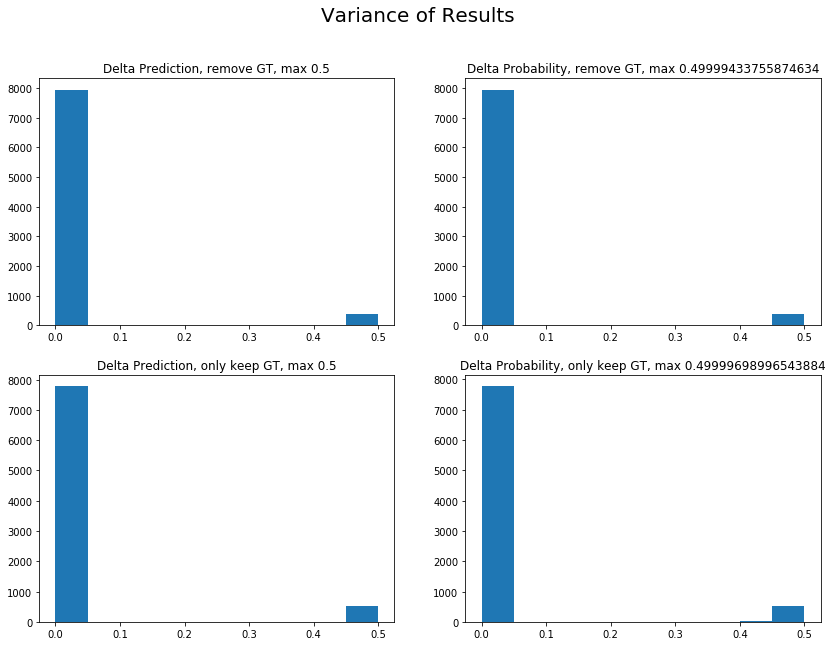

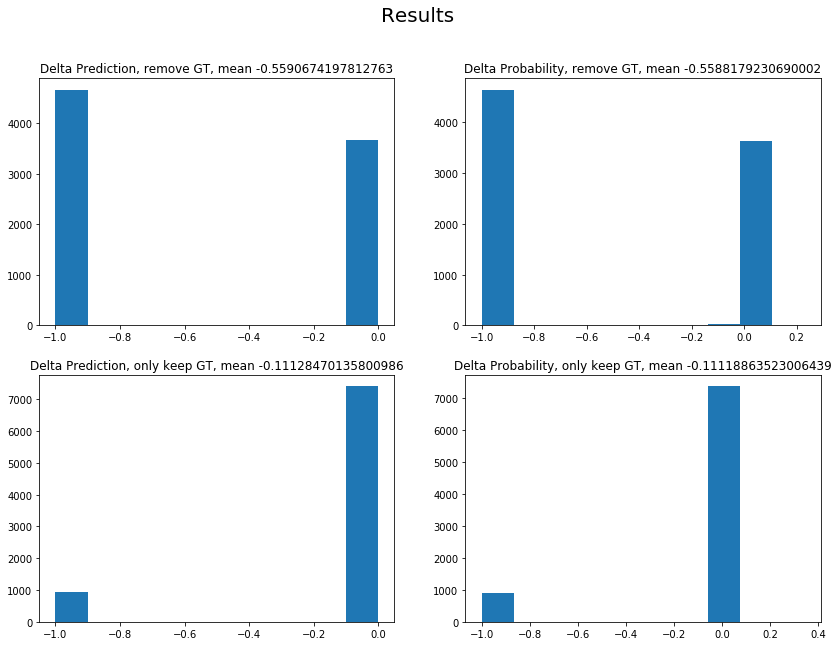

In [9]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_Classification(device=device), baseline_interpreter.random_interpreter, 'amazon')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)

100%|██████████| 9885/9885 [40:25<00:00,  4.08it/s]  


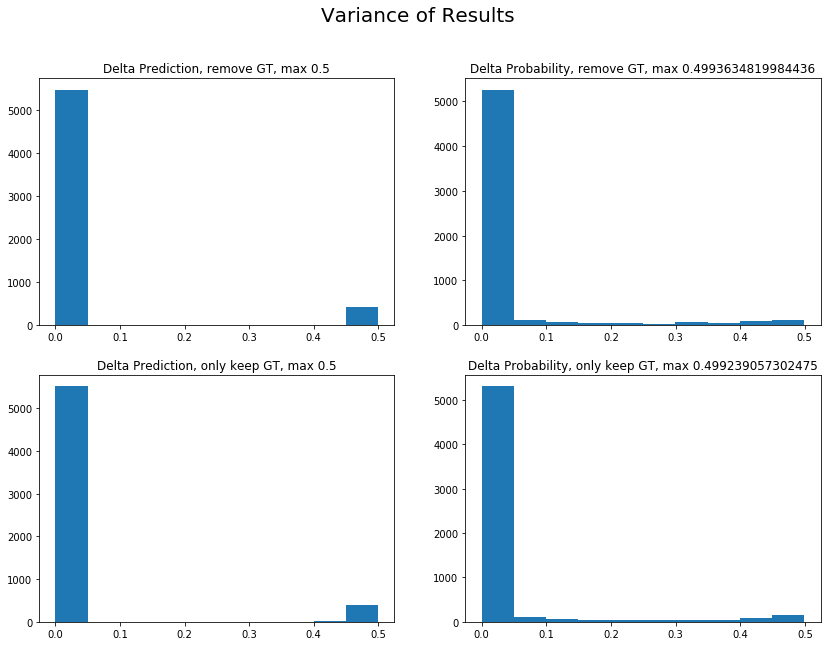

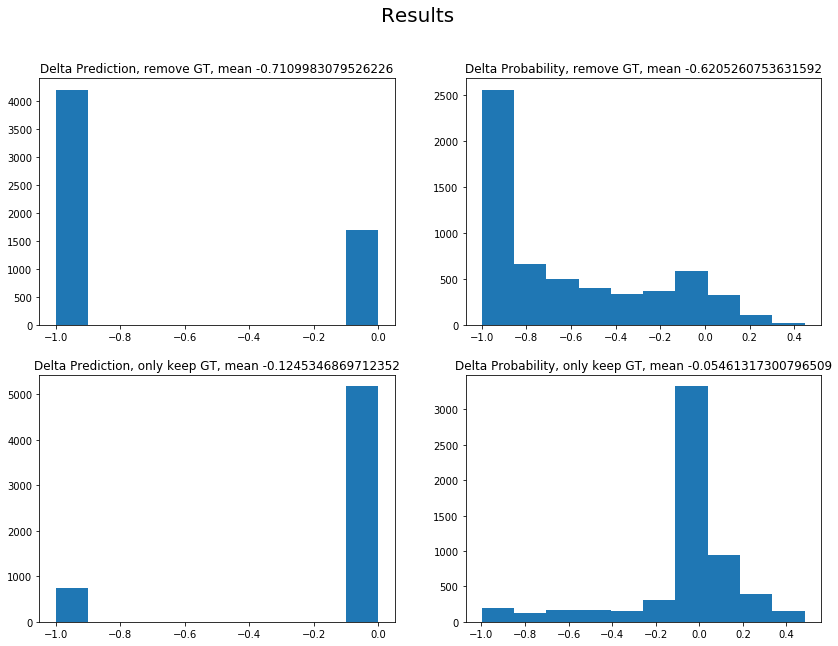

In [10]:
experimenter = qa_experimenters.SQuADShiftsExperimenter(models.Model_QA(device=device), baseline_interpreter.random_interpreter, 'amazon')
delta_pred, delta_prob, delta_pred_gt, delta_prob_gt = experimenter.test_gt()
plot_results(delta_pred, delta_prob, delta_pred_gt, delta_prob_gt)